In [1]:
from keras.datasets.mnist import load_data
# ((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [10]:
# keras
# Model(玩具): Sequential(往上) Model(彈性)\
# Layer(積木): Dense(全連接層)
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(128, activation="relu", input_dim=784))
# 128 * 10 
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss="categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [12]:
# reshape to 1D: mlp need 1D
# / 255: According to Tensorflow weights
# One-hot: 10 prob
# normalize原因: 隨機weights其實有一個喜歡的輸入區間
# Caffe:完全不normalize   TF: -1~1 0~1
from keras.utils.np_utils import to_categorical
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm = x_test.reshape(-1, 784) / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [15]:
# batch_size: 問幾筆資料才做一次梯度下降(走方向:平均)
# 小圖片: 100~200   中等圖片:10~20  大圖片: 1~5
# epochs: 整份資料要看幾次, 控制你到底要訓練到啥時
# validation_split: 你要區分多少來做驗證
# verbose: 預設1(最多log) 我喜歡選2(必要log)
# 5(epochs) * (60000 - 6000)訓練資料 / 200(batch) = 1350(次梯度調整)
model.fit(x_train_norm, y_train_cat,
          batch_size=200, 
          epochs=15,
          validation_split=0.1,
          verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/2
 - 1s - loss: 0.0238 - accuracy: 0.9944 - val_loss: 0.0715 - val_accuracy: 0.9797
Epoch 2/2
 - 1s - loss: 0.0212 - accuracy: 0.9954 - val_loss: 0.0700 - val_accuracy: 0.9790


In [16]:
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 19us/step


[0.07375145761780441, 0.9781000018119812]

In [31]:
import pandas as pd
from sklearn.metrics import confusion_matrix

pre = model.predict_classes(x_test_norm)
i = ["{}(正確)".format(n) for n in list(range(0, 10))]
c = ["{}(預測)".format(n) for n in list(range(0, 10))]
percents = []
for r in confusion_matrix(y_test, pre):
    percents.append(["{}%".format(round(n/sum(r) * 100, 2)) for n in r])
pd.DataFrame(percents,
             index=i,
             columns=c)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),98.88%,0.1%,0.31%,0.1%,0.0%,0.1%,0.2%,0.1%,0.1%,0.1%
1(正確),0.0%,99.12%,0.26%,0.0%,0.0%,0.0%,0.18%,0.09%,0.35%,0.0%
2(正確),0.39%,0.1%,97.87%,0.0%,0.19%,0.0%,0.29%,0.68%,0.48%,0.0%
3(正確),0.0%,0.0%,0.89%,97.43%,0.0%,0.4%,0.0%,0.4%,0.5%,0.4%
4(正確),0.2%,0.0%,0.2%,0.1%,97.45%,0.0%,0.31%,0.31%,0.1%,1.32%
5(正確),0.34%,0.0%,0.0%,1.01%,0.11%,97.09%,0.56%,0.11%,0.67%,0.11%
6(正確),0.73%,0.21%,0.21%,0.1%,0.42%,0.31%,97.6%,0.0%,0.42%,0.0%
7(正確),0.0%,0.1%,1.07%,0.49%,0.19%,0.0%,0.0%,97.28%,0.29%,0.58%
8(正確),0.51%,0.0%,0.51%,0.31%,0.21%,0.21%,0.1%,0.1%,97.64%,0.41%
9(正確),0.2%,0.2%,0.0%,0.59%,0.69%,0.2%,0.1%,0.4%,0.1%,97.52%


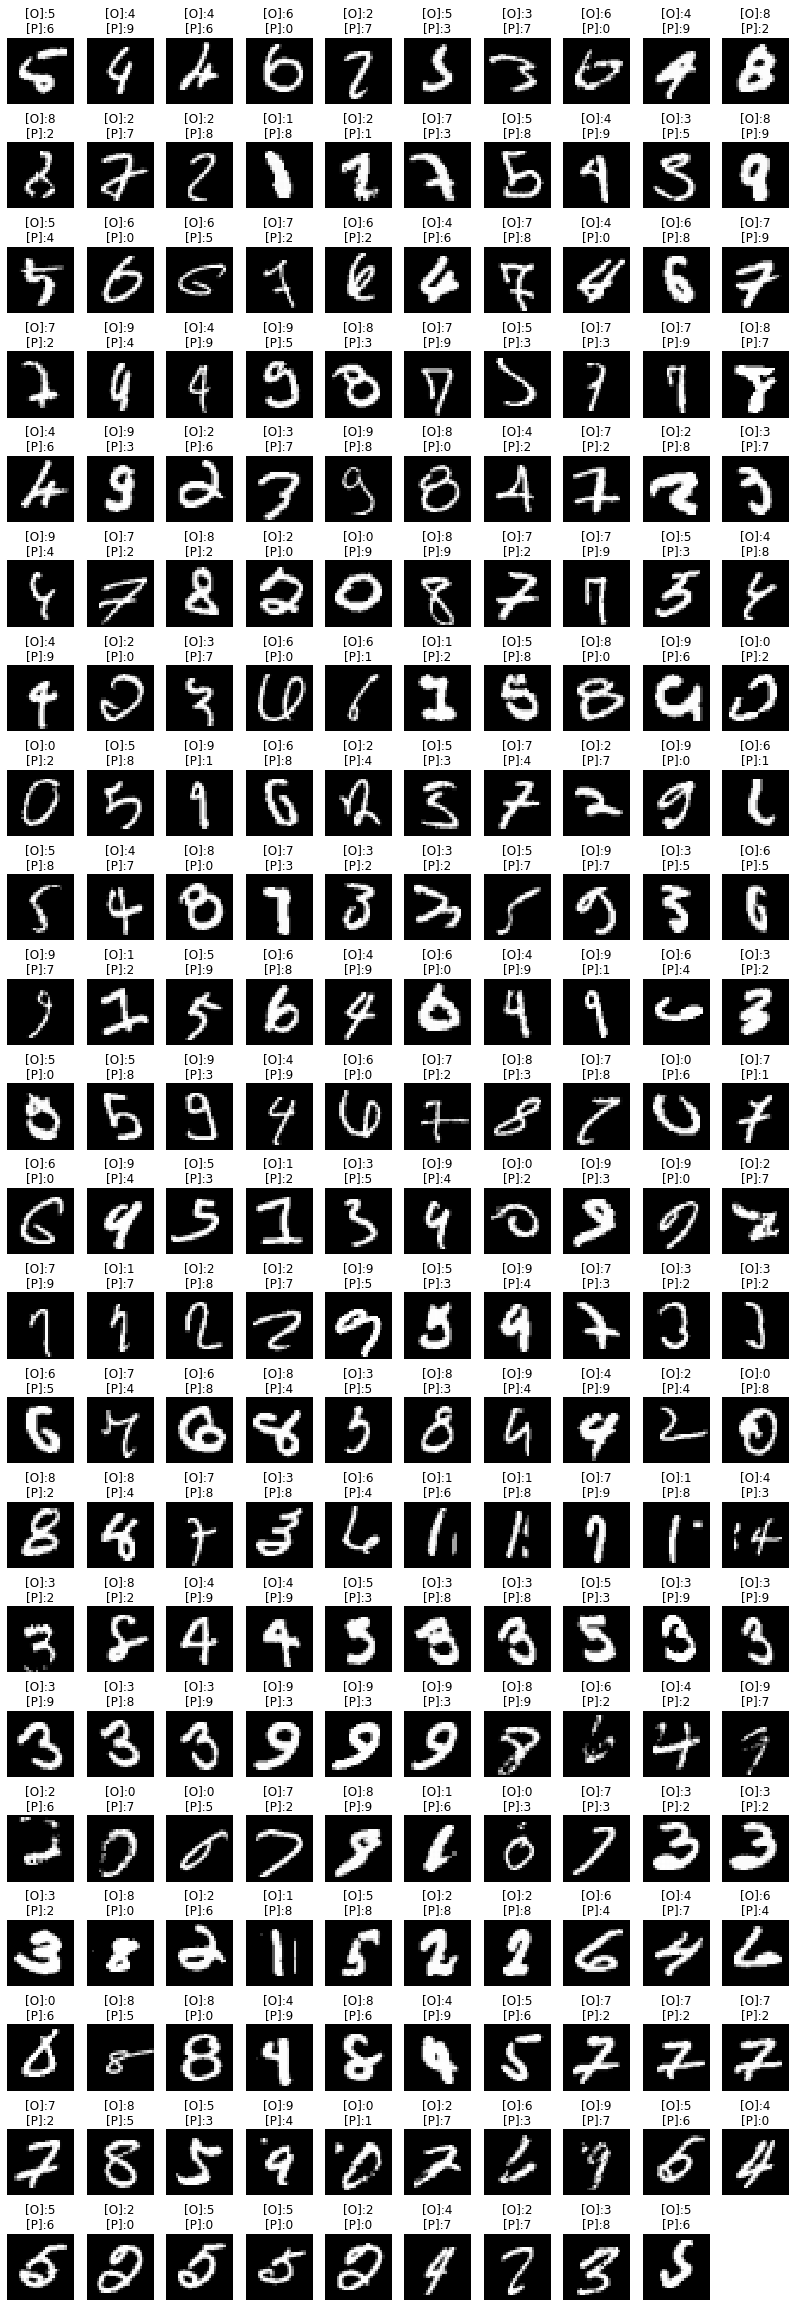

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

idx = np.nonzero(pre != y_test)[0]
pre_false_img = x_test[idx]
pre_false_label = y_test[idx]
pre_false_pre = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(14, 42))

z = zip(pre_false_img, pre_false_label, pre_false_pre)
# (i, (z1, z2, z3))
for i, (img, label, p) in enumerate(z):
    plt.subplot(height, width, i+1)
    plt.title("[O]:{}\n[P]:{}".format(label, p))
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [35]:
# HDFView: http://support.hdfgroup.org/ftp/HDF5/hdf-java/current/bin/HDFView-2.14-win_64.zip
model.save("mlp.h5")

In [37]:
from keras.models import load_model
temp = load_model("mlp.h5")
# 1. 再繼續訓練(fit)  2. predict
temp.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 23us/step


[0.07375145761780441, 0.9781000018119812]

輸入檔名:test2.png


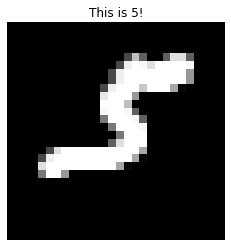

In [44]:
# Pillow
from keras.preprocessing.image import load_img
fn = input("輸入檔名:")
img = np.array(load_img(fn, target_size=(28, 28)).convert("L"))
img_np = img.reshape(1, 784) / 255
pre_test = model.predict_classes(img_np)[0]
t = "This is {}!".format(pre_test)
plt.title(t)
plt.axis("off")
plt.imshow(img, cmap="gray")